# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T06:35:39.561006+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

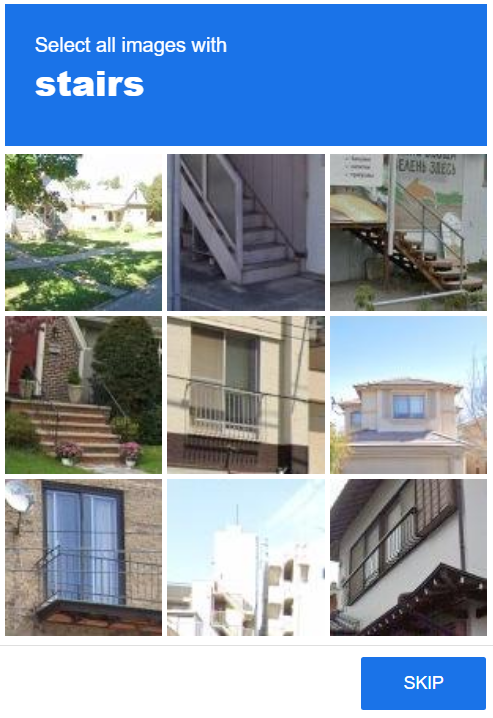

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "A white background with a blue button labeled 'SKIP' on the right side.")
    describe(1, "A 3x3 grid of images showing various buildings and structures, some of which include stairs.")
    describe(2, "A blue background with the instruction 'Select all images with stairs' written in white text.")

    # Step 2: Identify the relationships between frames.
    relate(2, 1, "Frame 2 provides the instruction to interact with the images in Frame 1.")
    relate(0, 2, "Frame 0 offers an option to skip the task described in Frame 2.")

    # Step 3: Identify the sequential events and the final visual criteria.
    objective(
        "Click on all grid images in Frame 1 that match the criteria described in Frame 2 ('stairs'), "
        "then confirm the selection or use the 'SKIP' button in Frame 0 to bypass the task."
    )

## Structure Abstraction

In [ ]:
def stage2(frames):
    # Frame 0: A blank screen with a 'SKIP' button
    frame_0 = frames[0]
    skip_button = frame_0.get_element(position='down', details='blue button with text SKIP')
    skip_button.set_element_as(interactable='NEXT')

    # Frame 1: A 3x3 grid of images
    frame_1 = frames[1]
    grid_elements = frame_1.grid(tiles=9)
    for row in grid_elements:
        for element in row:
            element.set_element_as(interactable='SELECTABLE')

## Solution Composition

In [ ]:
def stage3(frames):
    # Frame 2 provides the instruction to select images with bridges in Frame 1
    instruction_frame = frames[2] if len(frames) == 3 else frames[0]
    image_frame = frames[1]

    target_object = ask([instruction_frame.image], "What is the target object?", "str")
    target_object = "".join(target_object)

    # Mark images in Frame 1 to identify bridges
    marked_images = mark([image_frame.get_interactable(i).image for i in range(9)], target_object)

    # Ask which images contain bridges
    bridge_answers = ask(marked_images, f"Does this image contain a {target_object}?", answer_type="bool")

    # Select images that contain bridges
    for i, has_bridge in enumerate(bridge_answers):
        if has_bridge:
            select(image_frame.get_interactable(i))

    # Click 'NEXT' to proceed
    next_button = frames[0].get_interactable(0)
    click(next_button)

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: What is the target object?
Output a list of strings for each image.
You should follow the format `answer(strings=["a", "b", ...])` to answer the question.

'''

Image 0
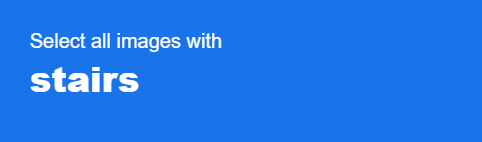

In [ ]:
IMAGES = 1

In [ ]:
RESPONSE = '''
answer(strings=["stairs"])
'''
TIME = 1.5887801796197891
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 506
PROMPT_TOKENS = 500
COMPLETION_TOKENS = 6

---

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: Does this image contain a stairs?
Output a list of (True/False) for each image.
You should follow the format `answer(booleans=[True, False, ...])` to answer the question.

'''

Image 0 Image 1 Image 2 Image 3 Image 4 Image 5 Image 6 Image 7 Image 8
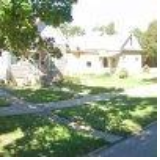
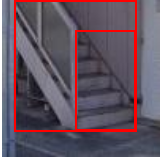
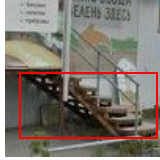
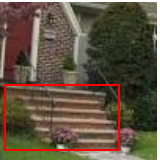
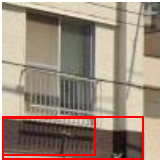
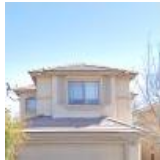
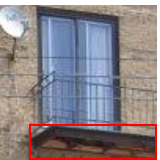
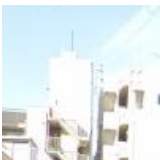
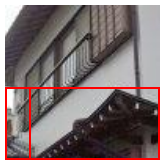

In [ ]:
IMAGES = 9

In [ ]:
RESPONSE = '''
answer(booleans=[False, True, True, True, False, False, False, False, False])
'''
TIME = 4.015838826075196
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 2236
PROMPT_TOKENS = 2211
COMPLETION_TOKENS = 25

---